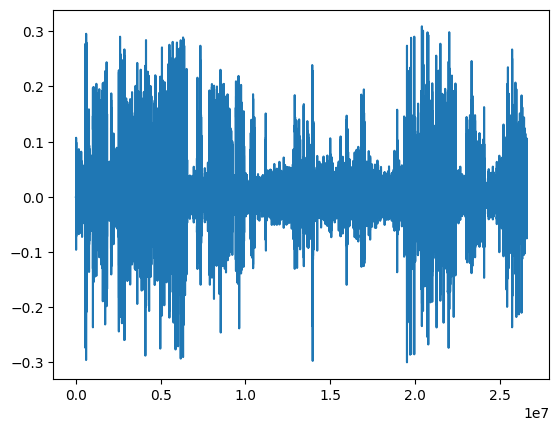

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

waveform, sr = librosa.load('dataset/raw_data/2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449.wav')

# waveform은 ndarray로 나와서 시각화로 확인이 필요합니다.
# 
plt.plot(waveform)

In [2]:
type(waveform)

numpy.ndarray

In [12]:
# 데이터 길이 / sampling rate -> 음성 파일 시간
print(f'음성 시간 : {len(waveform) // sr // 3600}h: {len(waveform) // sr // 60}m: {len(waveform) // sr % 60}s')

음성 시간 : 0h: 20m: 6s


In [ ]:
# 멜스토그램 만들기
# win_lemgth : 자를때 자를 작은 조각의 크기(기본이 25ms)
# n_fft : win_length 크기로 잘린 음성의 작은 조각은 0으로 패딩되어서 n_fft로 크기가 맞춰짐. (일반적으로, 속도를 위해서 2^n으로 설정해야 함, win_length보다 크거나 같아야 함)
# hop_length : 자르는 간격
